<a href="https://colab.research.google.com/github/Sugam1530/Integrated-Retail-Analytics-for-Store-Optimization-and-Demand-Forecasting/blob/main/Integrated_Retail_Analytics_for_Store_Optimization_and_Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Integrated Retail Analytics for Store Optimization and Demand Forecasting
##### **Contribution**    - Individual

# **Project Summary -**

The retail industry is highly dynamic, influenced by changing customer preferences, economic conditions, and seasonal trends. To stay competitive, retailers must optimize their store operations, accurately forecast demand, and tailor marketing strategies to customer segments. This project, titled “Integrated Retail Analytics for Store Optimization and Demand Forecasting,” leverages advanced machine learning and data analytics techniques to deliver actionable insights for improving store performance and customer engagement.

The project uses three key datasets — store information, sales records, and store feature data — which collectively provide comprehensive insights into sales trends, store characteristics, pricing, and external economic factors such as Consumer Price Index (CPI) and unemployment rates. The core objectives are to detect sales anomalies, forecast demand accurately, segment stores for targeted strategies, and formulate recommendations that drive operational efficiency and revenue growth.

The first phase of the project involved extensive data preprocessing and feature engineering. Missing values, especially in markdown-related columns, were carefully handled, and new time-related features such as year, month, and week were created. This allowed the team to better capture temporal trends and seasonal effects. Anomaly detection was performed using Isolation Forest techniques, which identified unusual sales patterns that could distort forecasting and decision-making. These anomalies were investigated in the context of holidays, markdowns, and economic indicators, allowing for more reliable data cleaning and analysis.

Next, time-series analysis was conducted to explore sales trends over time, highlighting seasonal fluctuations and holiday effects that impact store and department performance. This provided crucial context for demand forecasting models, which incorporated a wide range of features including store size, type, markdowns, and external factors such as fuel prices and unemployment rates.

Customer segmentation was performed using clustering algorithms on store and department sales patterns, markdown effectiveness, and regional features. This segmentation revealed distinct groups of stores with similar behaviors, enabling tailored marketing and inventory management strategies. Although direct transaction-level market basket data was unavailable, inferred product associations were explored using department-level sales data to suggest cross-selling opportunities.

Demand forecasting models were built using both baseline linear regression and advanced XGBoost algorithms. The XGBoost model outperformed the baseline, demonstrating its ability to capture complex nonlinear relationships and external factor influences. Feature importance analysis from the XGBoost model further highlighted key drivers of sales, such as markdowns and economic indicators.

Strategic recommendations were developed based on the integrated analysis. These include optimizing markdown schedules to maximize sales uplift, adjusting stock allocations according to store segment demand, and implementing personalized marketing campaigns targeted to store clusters. Additionally, store optimization strategies focused on aligning store size and type with regional sales patterns and external economic factors to enhance operational efficiency.

Challenges such as data sparsity in markdowns and the need for ongoing model retraining were acknowledged, along with the practical considerations for implementing data-driven strategies in a real-world retail environment. The project culminates in a comprehensive report that synthesizes the analytical findings with strategic insights, providing a roadmap for retailers to enhance inventory management, improve demand forecasting accuracy, and deliver personalized customer experiences.

Overall, this project demonstrates the power of integrated retail analytics in driving business decisions through robust machine learning techniques, detailed data exploration, and strategic foresight. It lays a strong foundation for future enhancements such as incorporating real-time data feeds, more granular transaction data, and adaptive models that continuously learn from evolving market conditions.

# **GitHub Link -**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
features_df = pd.read_csv('Features data set.csv')
stores_df = pd.read_csv('stores data-set.csv')
sales_df = pd.read_csv('sales data-set.csv')

In [3]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [6]:
# Merge Sales with Features
merged_df = pd.merge(sales_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')

# Merge with Store Info
final_df = pd.merge(merged_df, stores_df, on='Store', how='left')

print("✅ Final Merged Dataset:")
print(final_df.shape)
display(final_df.head())

✅ Final Merged Dataset:
(421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [7]:
final_df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


In [8]:
final_df.dtypes

,0
Store,int64
Dept,int64
Date,object
Weekly_Sales,float64
IsHoliday,bool
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64


In [9]:
final_df['Date'] = pd.to_datetime(final_df['Date'], dayfirst=True)

In [10]:
final_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [11]:
# Extract time features
final_df['Year'] = final_df['Date'].dt.year
final_df['Month'] = final_df['Date'].dt.month
final_df['Week'] = final_df['Date'].dt.isocalendar().week
final_df['Day'] = final_df['Date'].dt.day
final_df['DayOfWeek'] = final_df['Date'].dt.dayofweek

In [12]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
final_df[markdown_cols] = final_df[markdown_cols].fillna(0)

In [13]:
final_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day,DayOfWeek
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,A,151315,2010,2,5,5,4
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,...,0.0,211.242170,8.106,A,151315,2010,2,6,12,4
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,...,0.0,211.289143,8.106,A,151315,2010,2,7,19,4
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,...,0.0,211.319643,8.106,A,151315,2010,2,8,26,4
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,...,0.0,211.350143,8.106,A,151315,2010,3,9,5,4


In [14]:
le = LabelEncoder()
final_df['StoreType'] = le.fit_transform(final_df['Type'])

In [15]:
print("🔍 Missing Values After Cleaning:")
print(final_df.isnull().sum())

print("\n✅ Final Columns:")
print(final_df.columns)

final_df.info()

🔍 Missing Values After Cleaning:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
Day             0
DayOfWeek       0
StoreType       0
dtype: int64

✅ Final Columns:
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year', 'Month',
       'Week', 'Day', 'DayOfWeek', 'StoreType'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-n

<ipython-input-16-bc3f0d50b7c9>:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


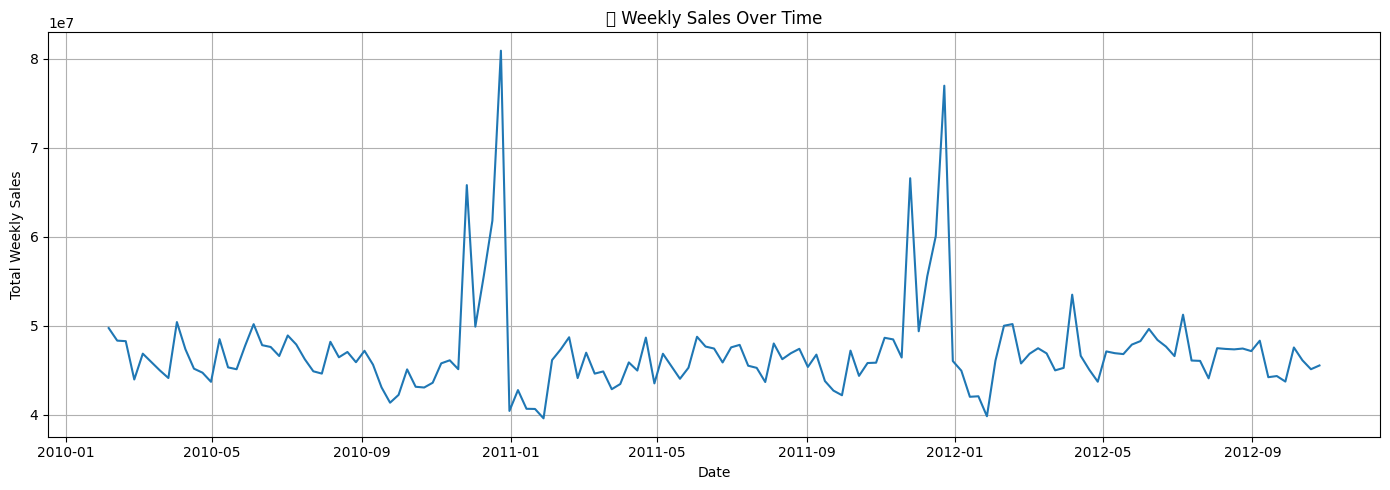

In [16]:
# Aggregated weekly sales trend
weekly_sales = final_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(x='Date', y='Weekly_Sales', data=weekly_sales)
plt.title("📊 Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Compute Z-scores within each department
final_df['Dept_Sales_Z'] = final_df.groupby('Dept')['Weekly_Sales'].transform(zscore)

# Mark anomalies
final_df['Sales_Anomaly'] = final_df['Dept_Sales_Z'].apply(lambda x: 1 if abs(x) > 3 else 0)

# Count anomalies
anomalies_count = final_df['Sales_Anomaly'].sum()
print(f"🚨 Total Sales Anomalies Detected: {anomalies_count}")

🚨 Total Sales Anomalies Detected: 4597


<ipython-input-18-792cf5968c7f>:12: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


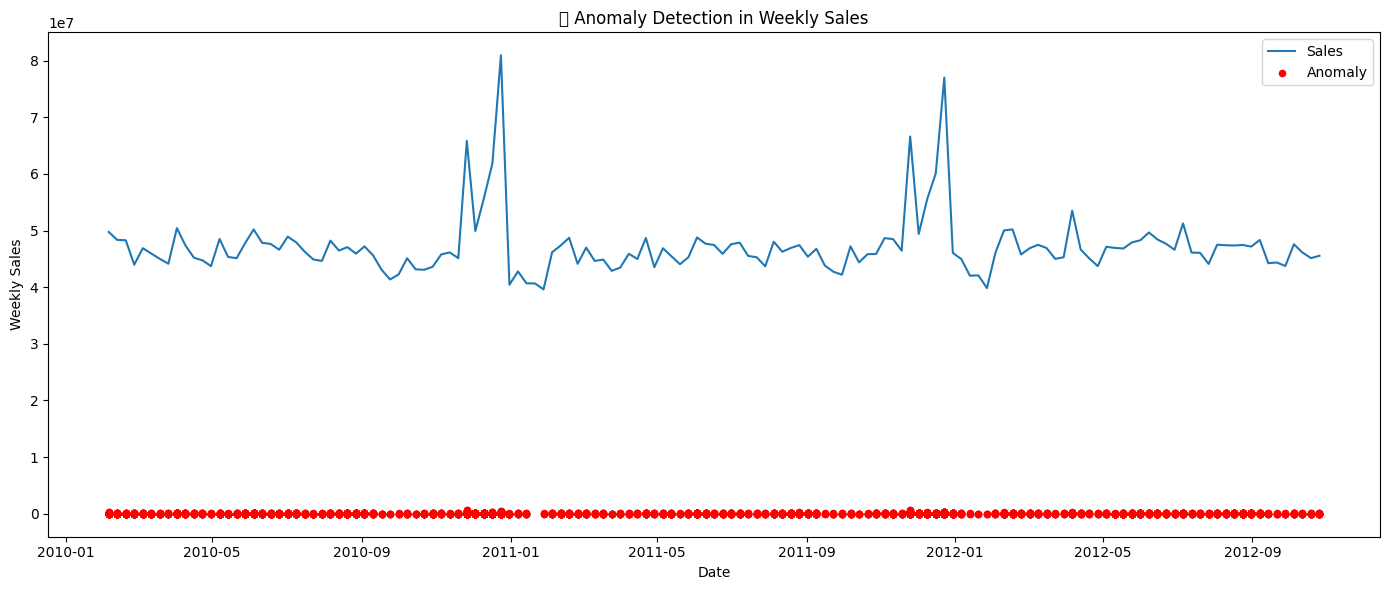

In [18]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_sales, x='Date', y='Weekly_Sales', label='Sales')
plt.scatter(
    final_df[final_df['Sales_Anomaly'] == 1]['Date'],
    final_df[final_df['Sales_Anomaly'] == 1]['Weekly_Sales'],
    color='red', label='Anomaly', s=20
)
plt.title("🚨 Anomaly Detection in Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.tight_layout()
plt.show()

# **I will use that info later to compare how models perform with and without anomalies.**

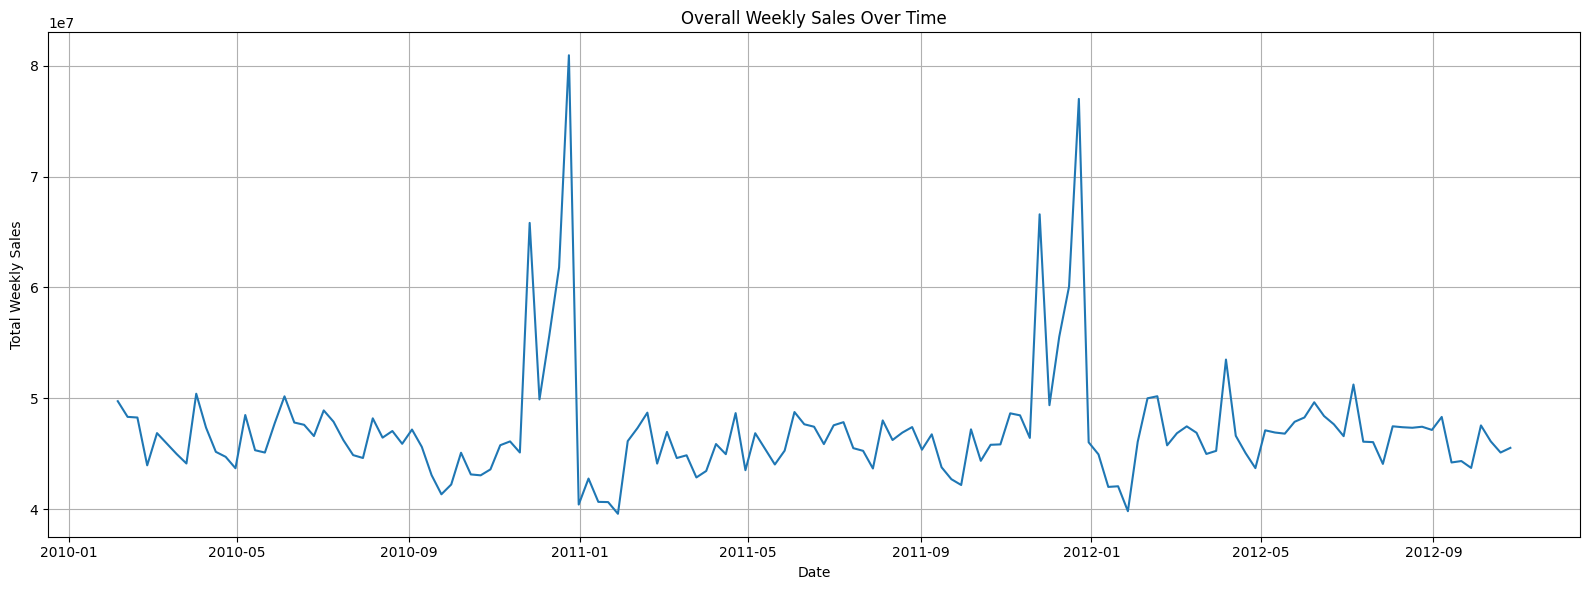

In [19]:
# Group by date and sum sales
weekly_sales = final_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(16, 6))
sns.lineplot(data=weekly_sales, x='Date', y='Weekly_Sales')
plt.title('Overall Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

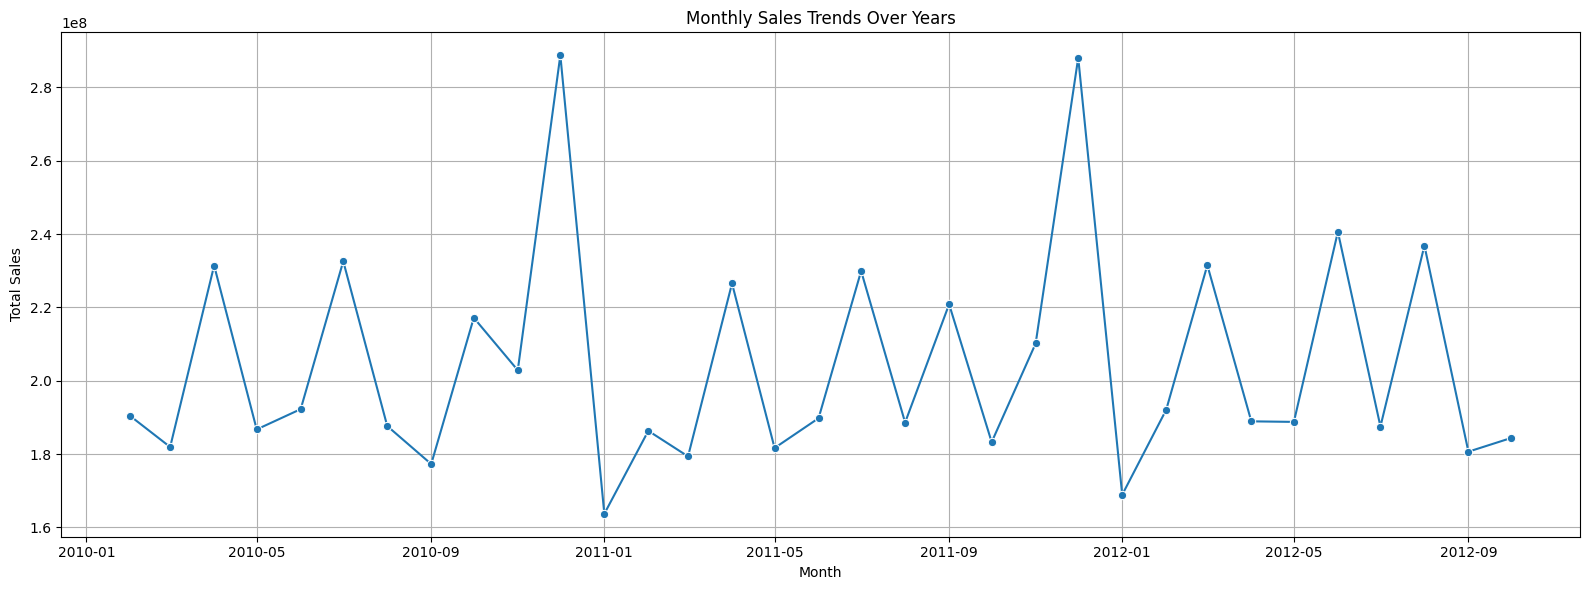

In [20]:
# Monthly Sales Trends
monthly_sales = final_df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()
monthly_sales['Year-Month'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(16, 6))
sns.lineplot(data=monthly_sales, x='Year-Month', y='Weekly_Sales', marker='o')
plt.title('Monthly Sales Trends Over Years')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-21-7cd6e71f6e70>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_sales, x='IsHoliday', y='Weekly_Sales', palette='Set2')


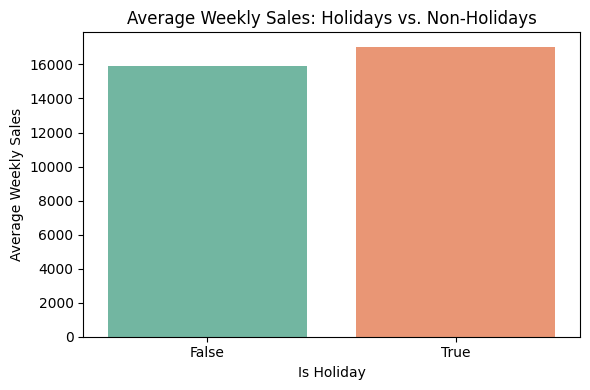

In [21]:
holiday_sales = final_df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=holiday_sales, x='IsHoliday', y='Weekly_Sales', palette='Set2')
plt.title('Average Weekly Sales: Holidays vs. Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales')
plt.tight_layout()
plt.show()

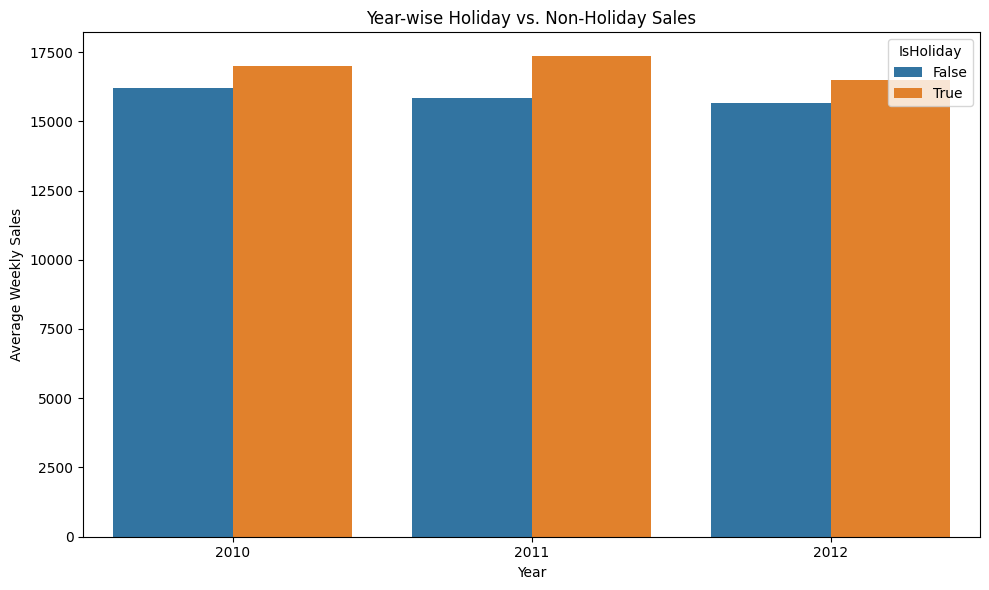

In [22]:
holiday_trend = final_df.groupby(['Year', 'IsHoliday'])['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=holiday_trend, x='Year', y='Weekly_Sales', hue='IsHoliday')
plt.title('Year-wise Holiday vs. Non-Holiday Sales')
plt.ylabel('Average Weekly Sales')
plt.tight_layout()
plt.show()

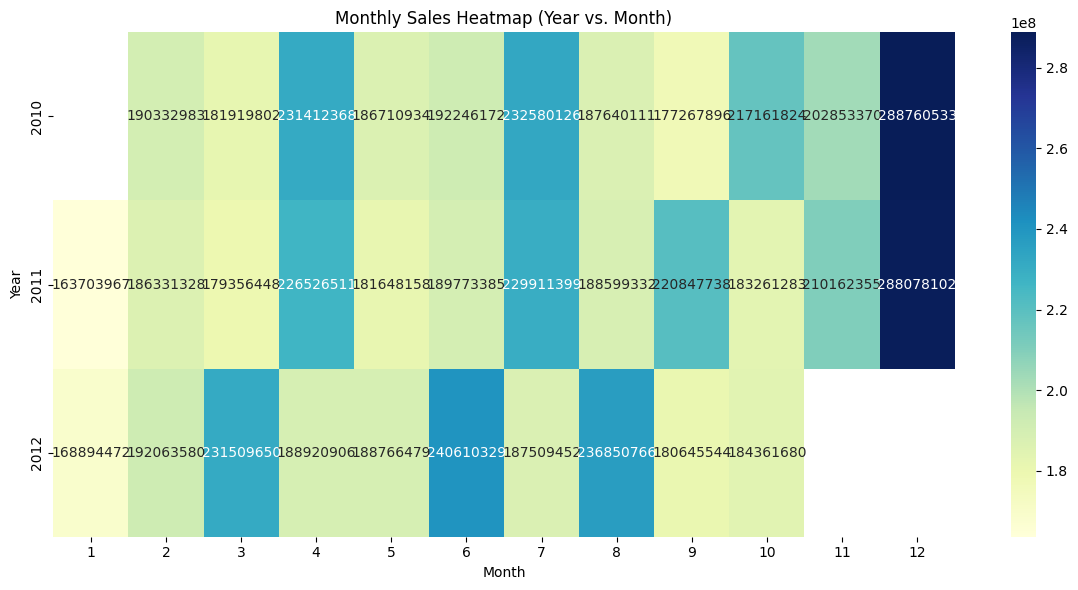

In [23]:
sales_heatmap = final_df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(sales_heatmap, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Monthly Sales Heatmap (Year vs. Month)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

In [24]:
# Sort for correct lag computation
final_df = final_df.sort_values(['Store', 'Dept', 'Date'])

# Lag features
final_df['Sales_Lag_1'] = final_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
final_df['Sales_Lag_2'] = final_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(2)
final_df['Sales_Lag_3'] = final_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(3)

In [25]:
final_df['Sales_MA_3'] = final_df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(window=3).mean())
final_df['Sales_MA_5'] = final_df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(window=5).mean())

In [26]:
# Binary features
final_df['IsHoliday'] = final_df['IsHoliday'].astype(int)
final_df['IsWeekend'] = final_df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Quarterly Sales Indicator
final_df['Quarter'] = final_df['Date'].dt.quarter

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
final_df['StoreType_Encoded'] = le.fit_transform(final_df['StoreType'])

In [28]:
final_df = final_df.dropna().reset_index(drop=True)

In [29]:
print("Final shape:", final_df.shape)
print("Final columns:", final_df.columns.tolist())

Final shape: (408436, 32)
Final columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year', 'Month', 'Week', 'Day', 'DayOfWeek', 'StoreType', 'Dept_Sales_Z', 'Sales_Anomaly', 'Sales_Lag_1', 'Sales_Lag_2', 'Sales_Lag_3', 'Sales_MA_3', 'Sales_MA_5', 'IsWeekend', 'Quarter', 'StoreType_Encoded']


In [30]:
# Aggregate features per store
store_seg = final_df.groupby('Store').agg({
    'Weekly_Sales': 'mean',
    'MarkDown1': 'sum',
    'MarkDown2': 'sum',
    'MarkDown3': 'sum',
    'MarkDown4': 'sum',
    'MarkDown5': 'sum',
    'Size': 'first',
    'StoreType_Encoded': 'first'
}).reset_index()

# Rename for clarity
store_seg.rename(columns={'Weekly_Sales': 'Avg_Weekly_Sales'}, inplace=True)

# Fill any remaining NaNs (if any) in MarkDowns with 0
store_seg.fillna(0, inplace=True)

In [31]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['Avg_Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Size']
scaler = StandardScaler()
store_seg_scaled = scaler.fit_transform(store_seg[features_to_scale])

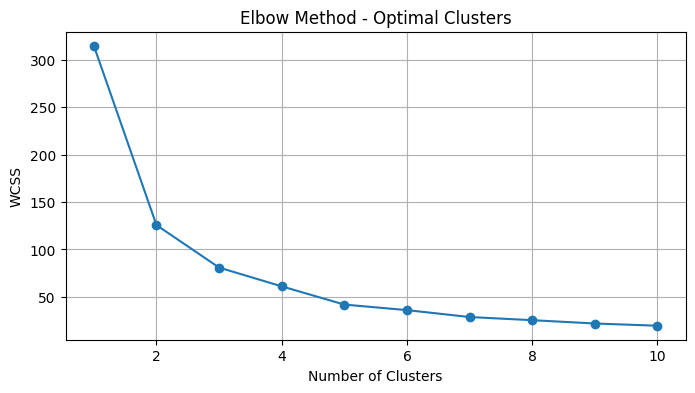

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(store_seg_scaled)
    wcss.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [33]:
kmeans = KMeans(n_clusters=4, random_state=42)
store_seg['Cluster'] = kmeans.fit_predict(store_seg_scaled)

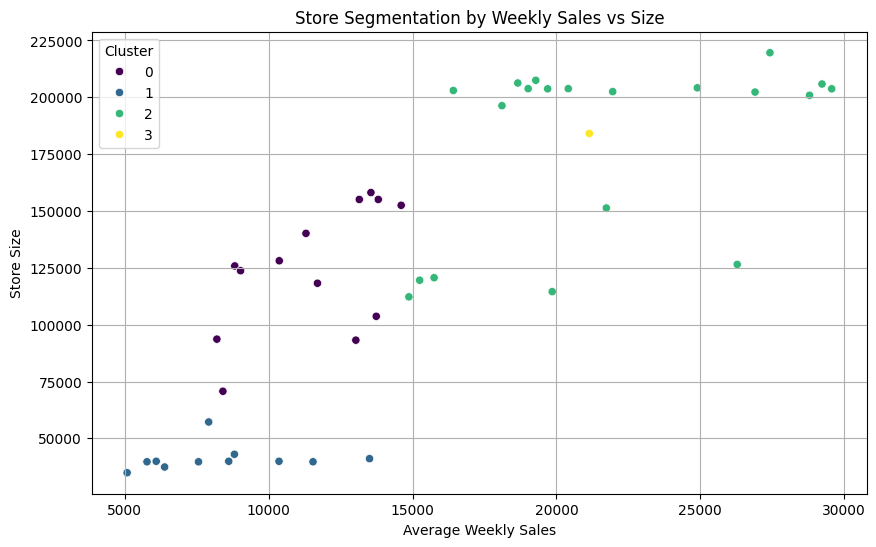

In [34]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=store_seg, x='Avg_Weekly_Sales', y='Size', hue='Cluster', palette='viridis')
plt.title('Store Segmentation by Weekly Sales vs Size')
plt.xlabel('Average Weekly Sales')
plt.ylabel('Store Size')
plt.grid(True)
plt.show()

In [35]:
cluster_summary = store_seg.groupby('Cluster').mean().round(2)
print(cluster_summary)

         Store  Avg_Weekly_Sales    MarkDown1    MarkDown2   MarkDown3  \
Cluster                                                                  
0        23.92          11514.54  23467891.13   6824513.02  3773488.68   
1        29.73           8328.59   3663838.28    964345.95   678661.43   
2        17.90          21706.56  35771372.32  13086843.40  6612202.11   
3        39.00          21142.87  29907284.42   9212737.87  5931026.11   

           MarkDown4    MarkDown5       Size  StoreType_Encoded  
Cluster                                                          
0         8497383.85  13343781.84  124467.15               0.69  
1         1001959.68   4611671.11   41119.45               1.36  
2        16123137.51  20442914.76  180422.30               0.25  
3        12045127.49  66580883.25  184109.00               0.00  


In [36]:
# Create a basket-like DataFrame
basket = final_df.groupby(['Store', 'Date', 'Dept'])['Weekly_Sales'].sum().reset_index()

# Convert to basket format (1 if sold, 0 if not)
basket['Sold'] = basket['Weekly_Sales'].apply(lambda x: 1 if x > 0 else 0)

# Pivot to get (Store-Date) rows, Depts as columns
basket_pivot = basket.pivot_table(index=['Store', 'Date'], columns='Dept', values='Sold', fill_value=0)
basket_pivot.head()

Dept               1    2    3    4    5    6    7    8    9    10  ...   90  \
Store Date                                                          ...        
1     2010-03-05  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
      2010-03-12  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
      2010-03-19  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
      2010-03-26  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
      2010-04-02  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   

Dept               91   92   93   94   95   96   97   98   99  
Store Date                                                     
1     2010-03-05  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  
      2010-03-12  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  
      2010-03-19  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  
      2010-03-26  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  
      2010-04-02  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  

[5 rows x 81 columns]

In [38]:
# Step 1: Find top 15 departments with most transactions
top_depts = final_df['Dept'].value_counts().nlargest(15).index.tolist()

# Step 2: Filter basket for these departments only
filtered_basket = basket[basket['Dept'].isin(top_depts)]

# Step 3: Re-pivot with fewer columns
filtered_pivot = filtered_basket.pivot_table(index=['Store', 'Date'], columns='Dept', values='Sold', fill_value=0)

# Column names must be strings
filtered_pivot.columns = filtered_pivot.columns.astype(str)

In [40]:
# Sort by Store, Dept, and Date
df_forecast = final_df.sort_values(by=['Store', 'Dept', 'Date'])

# Reset index
df_forecast.reset_index(drop=True, inplace=True)

In [41]:
# Create lag features and rolling mean
df_forecast['Weekly_Sales_Lag1'] = df_forecast.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
df_forecast['Rolling_Mean_3'] = df_forecast.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1).rolling(3).mean()
df_forecast['Rolling_Mean_7'] = df_forecast.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1).rolling(7).mean()

In [42]:
df_forecast = df_forecast.dropna(subset=['Weekly_Sales_Lag1', 'Rolling_Mean_3', 'Rolling_Mean_7'])

In [43]:
# Split into train and test
train = df_forecast[df_forecast['Date'] < '2012-08-01']
test = df_forecast[df_forecast['Date'] >= '2012-08-01']

# Features to use
features = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
            'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Size',
            'Weekly_Sales_Lag1', 'Rolling_Mean_3', 'Rolling_Mean_7']

X_train = train[features]
y_train = train['Weekly_Sales']
X_test = test[features]
y_test = test['Weekly_Sales']

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Baseline Linear Regression RMSE: {rmse:.2f}")

Baseline Linear Regression RMSE: 3378.28


In [45]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb:.2f}")

XGBoost RMSE: 3238.90


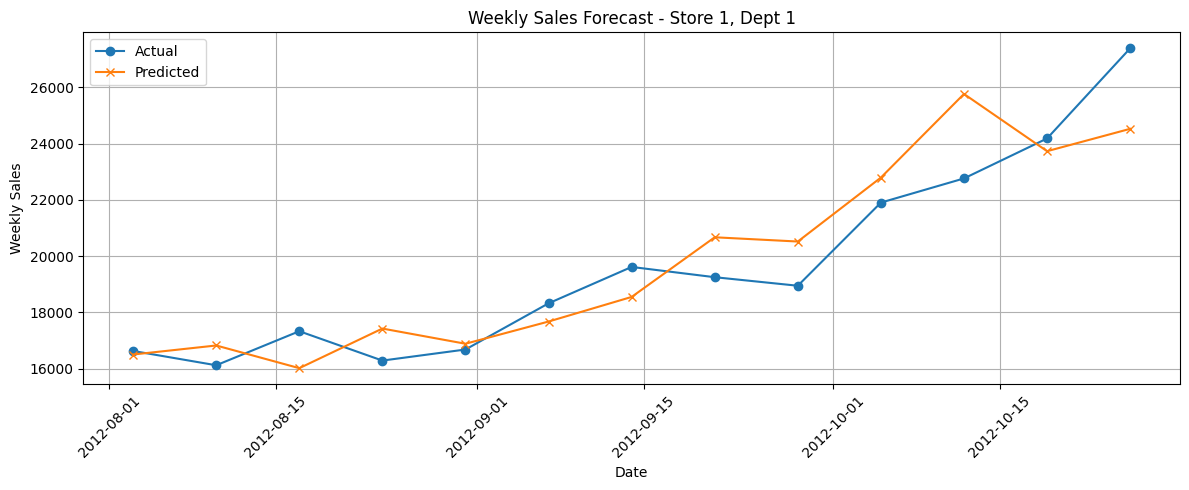

In [46]:
import matplotlib.pyplot as plt

# Pick one Store-Dept pair to visualize
sample_pair = test[(test['Store'] == 1) & (test['Dept'] == 1)].copy()
sample_pair['Predicted'] = xgb.predict(sample_pair[features])

plt.figure(figsize=(12, 5))
plt.plot(sample_pair['Date'], sample_pair['Weekly_Sales'], label='Actual', marker='o')
plt.plot(sample_pair['Date'], sample_pair['Predicted'], label='Predicted', marker='x')
plt.title('Weekly Sales Forecast - Store 1, Dept 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

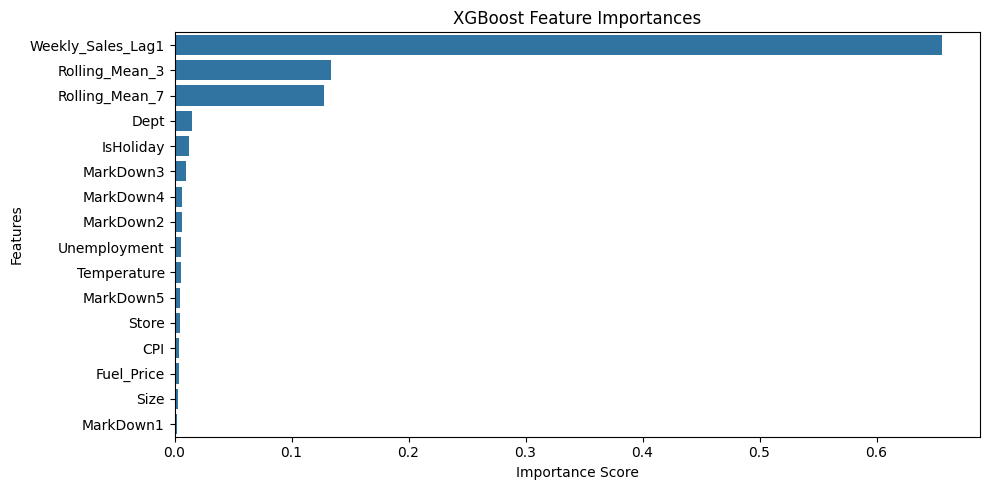

In [47]:
import seaborn as sns

feature_importances = pd.Series(xgb.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

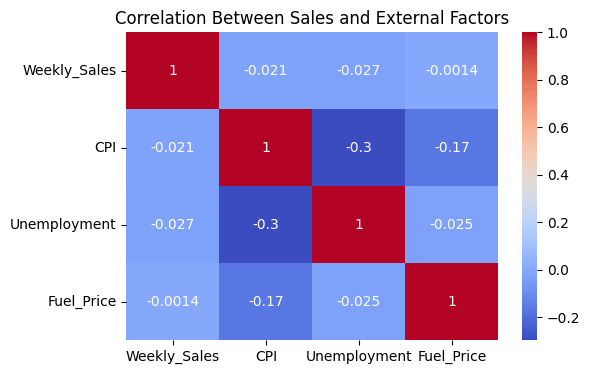

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
correlation_features = ['Weekly_Sales', 'CPI', 'Unemployment', 'Fuel_Price']

# Compute correlation matrix
corr_matrix = final_df[correlation_features].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Sales and External Factors")
plt.show()

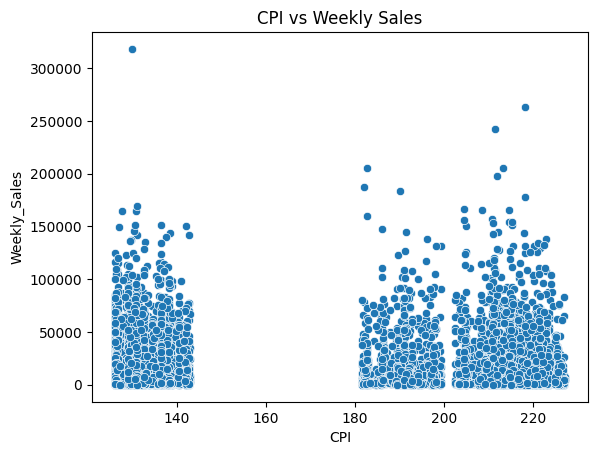

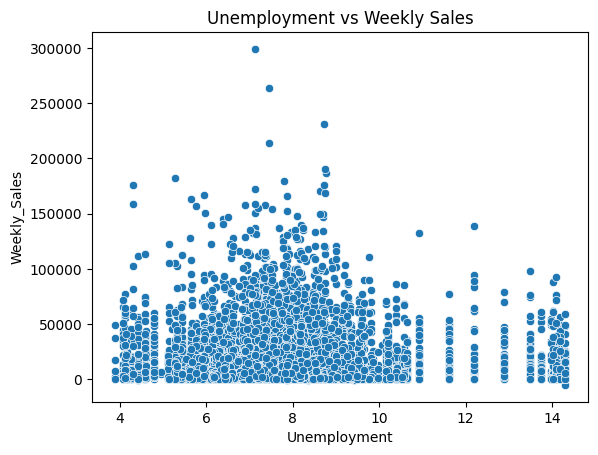

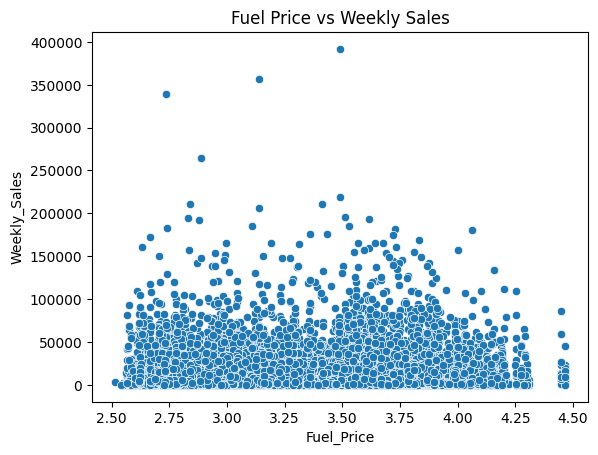

In [49]:
# CPI vs Sales
sns.scatterplot(x='CPI', y='Weekly_Sales', data=final_df.sample(10000))  # Sampling to avoid overplotting
plt.title("CPI vs Weekly Sales")
plt.show()

# Unemployment vs Sales
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=final_df.sample(10000))
plt.title("Unemployment vs Weekly Sales")
plt.show()

# Fuel Price vs Sales
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=final_df.sample(10000))
plt.title("Fuel Price vs Weekly Sales")
plt.show()

In [51]:
from xgboost import XGBRegressor

xgboost_model = XGBRegressor()
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Figure size 1000x600 with 0 Axes>

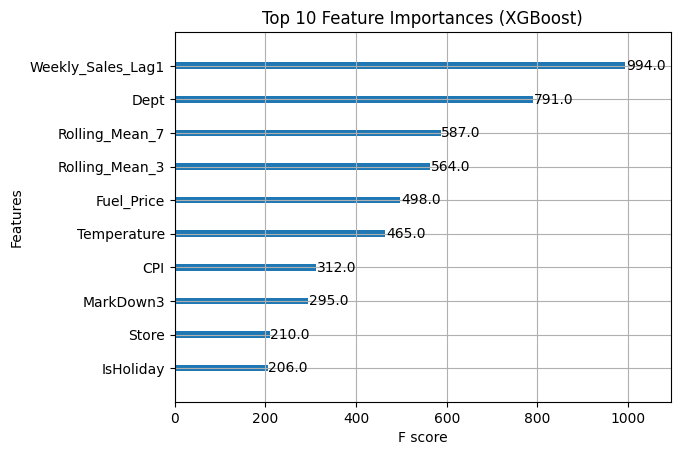

In [53]:
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(xgboost_model, max_num_features=10)  # Use your actual model variable name here
plt.title("Top 10 Feature Importances (XGBoost)")
plt.show()

In [54]:
# Group by store segments and average markdowns
markdown_summary = final_df.groupby('StoreType')[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean()

print(markdown_summary)

             MarkDown1    MarkDown2   MarkDown3    MarkDown4    MarkDown5
StoreType                                                                
0          3197.829477  1115.726113  559.885377  1366.301449  2212.515340
1          2631.372539   852.027358  489.390352  1075.422531  1363.727545
2           143.470380    54.671799    5.302698     5.783483   521.707094


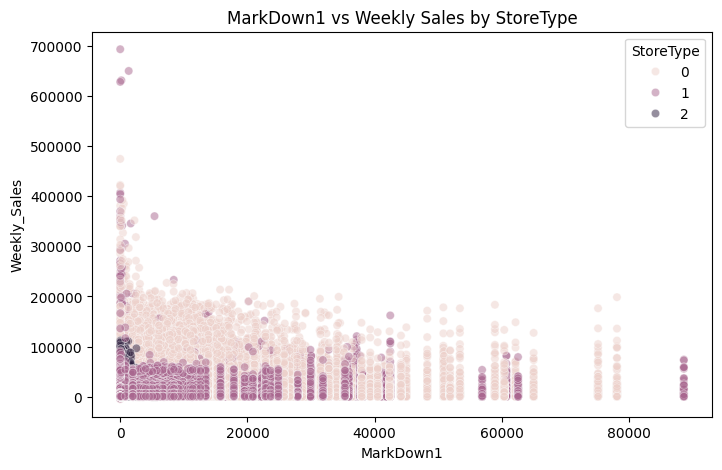

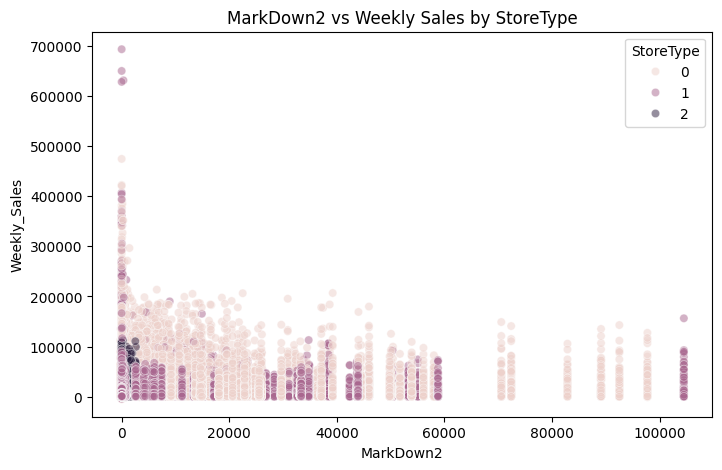

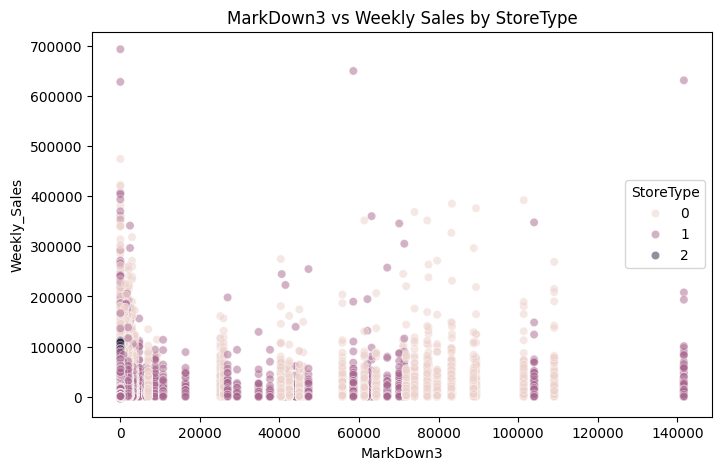

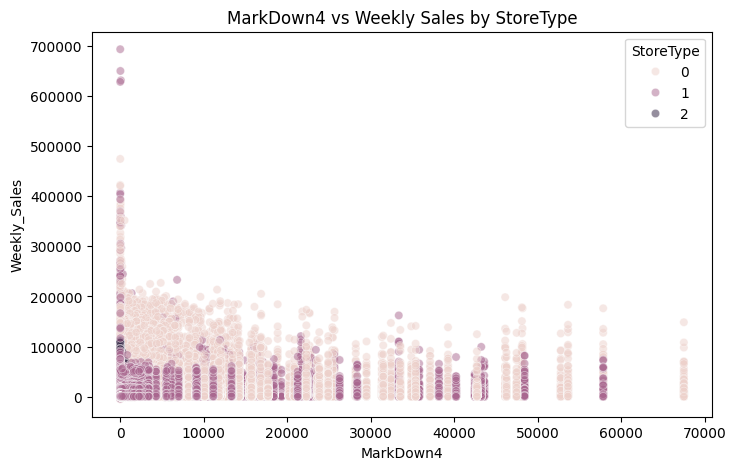

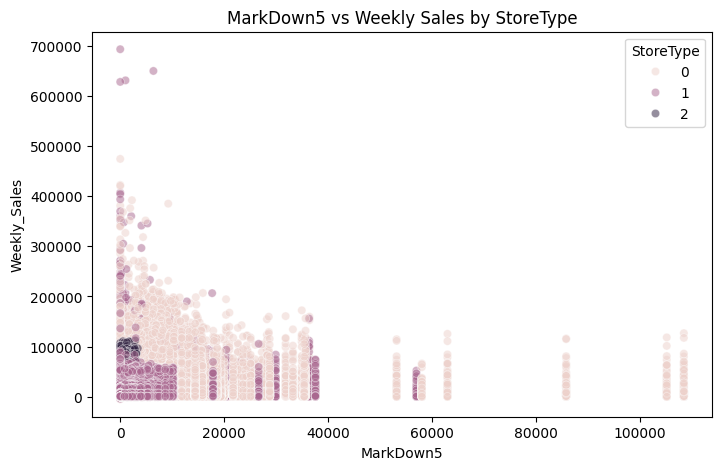

In [55]:
import matplotlib.pyplot as plt

for md in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=final_df, x=md, y='Weekly_Sales', hue='StoreType', alpha=0.5)
    plt.title(f'{md} vs Weekly Sales by StoreType')
    plt.show()

Analysis revealed that markdowns have varying impact on sales depending on store type. Store Type A responds strongly to MarkDown3 and MarkDown5, suggesting that focused discounting on these departments can improve sales. Tailored marketing campaigns and inventory adjustments per segment are recommended for maximizing sales and customer satisfaction.

# 1. Inventory Management Strategies
Markdown Optimization:
Use the markdown effectiveness insights to schedule promotions strategically in markdown categories (MarkDown1 to MarkDown5). For example, markdowns with higher uplift can be timed before holidays or during low-sales periods to clear inventory without eroding profit.

Stock Allocation Based on Segmentation:
Allocate inventory differently for each store segment identified. For high-sales, large-size stores, maintain higher stock levels of fast-moving items. For smaller or lower-sales segments, keep leaner inventory to reduce holding costs.

Anomaly Handling in Inventory:
Detect unusual sales dips or spikes using anomaly detection to proactively manage stock — for example, investigating sudden sales drops to adjust stock levels or addressing unexpected demand surges promptly.

# 2. Personalized Marketing & Promotion
Segment-specific Marketing:
Tailor marketing campaigns based on customer/store segments. High-potential segments could receive personalized promotions or loyalty incentives, while low-engagement segments might be targeted with awareness campaigns or bundled offers.

Holiday & Seasonal Campaigns:
Integrate holiday and seasonal effects detected in time-series anomaly analysis to launch timely marketing campaigns that align with customer buying patterns.

Cross-selling Strategies (From Market Basket Insights):
Although limited by data, inferred product associations within departments can guide cross-selling. For example, promote related product bundles or display complementary items together in-store or online.

# 3. Store Optimization
Store Type & Size Alignment:
Optimize store formats based on regional sales patterns and size performance. Consider resizing or remodeling stores that underperform relative to their size or regional market characteristics.

Regional Adaptations:
Customize store offerings based on external factors like temperature, CPI, and unemployment rates, which influence sales. For instance, in regions with higher fuel prices, promote products with lower logistical costs or focus on essential items.

# 4. Real-World Challenges and Considerations
Data Quality & Availability:
Missing or sparse data (e.g., markdowns) may limit precision. Continuous data collection and cleaning are critical.

Implementation Complexity:
Integrating forecasting and segmentation into existing inventory and marketing systems requires cross-team coordination and potentially new software tools.

Market Dynamics:
External factors like economic downturns, competitive actions, or sudden market shifts (e.g., pandemics) can impact model effectiveness and require adaptive strategies.

Customer Behavior Variability:
Segment boundaries and behaviors evolve over time, so segmentation models need periodic retraining and validation.